# Plotting routine for the Sep22 Event - PSP

In [ ]:
test = 'test'

In [1]:
%load_ext autoreload

%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pickle as p

import datetime as datetime
from datetime import timedelta
import seaborn as sns
import pandas as pd
import os
#import copy as cp

import multiprocessing
import py3dcore_h4c as py3dcore_h4c

import py3dcore_h4c.fluxplot as fp

#plt.switch_backend('agg')


import warnings
warnings.filterwarnings('ignore')

import logging

logging.basicConfig(level=logging.INFO)
logging.getLogger("heliosat.spice").setLevel("WARNING")
logging.getLogger("heliosat.spacecraft").setLevel("WARNING")
#logging.getLogger("sunpy").setLevel("WARNING")
#logging.getLogger("py3dcore_h4c.fluxplot").setLevel("WARNING")

#print(sns.__version__)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


#### setting the times for py3DCORE_h4c

In [87]:
t_launch = datetime.datetime(2022, 9, 5, 16, tzinfo=datetime.timezone.utc) # 

t_s = datetime.datetime(2022, 9, 5, 18, tzinfo=datetime.timezone.utc) 
t_e = datetime.datetime(2022, 9, 6, 4, tzinfo=datetime.timezone.utc)

t_fit = [
        datetime.datetime(2022, 9, 5, 18, 30, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 5, 20, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 0, 5, tzinfo=datetime.timezone.utc),
        datetime.datetime(2022, 9, 6, 2, tzinfo=datetime.timezone.utc)
     ]


#t_fit = fp.equal_t_creator(start = start, n = 4, delta = 6)

#####2022 Sep 5: 3 solar radii at 17 UT (COR2 & LASCO FoV appearance)
# 2022 Sep 5: 15 solar radii at 18:45 UT (PSP)

#### loading the pickle files

In [88]:
t_fit

[datetime.datetime(2022, 9, 5, 18, 30, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 5, 20, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 6, 0, 5, tzinfo=datetime.timezone.utc),
 datetime.datetime(2022, 9, 6, 2, 0, tzinfo=datetime.timezone.utc)]

In [89]:
path = 'output/psp05092022_heeq_512_10_fixedExpansion08/'

filepath = fp.loadpickle(path, number = -1)

In [90]:
filepath[:-7]

'output/psp05092022_heeq_512_10_fixedExpansion08/08'

#### extracting parameters

In [91]:
res, allres, ind, meanparams = fp.get_params(filepath, give_mineps=True)

INFO:py3dcore_h4c.fluxplot:Retrieved the following parameters for the run with minimum epsilon:
INFO:py3dcore_h4c.fluxplot: --lon:  125.76
INFO:py3dcore_h4c.fluxplot: --lat:  -19.31
INFO:py3dcore_h4c.fluxplot: --inc:  101.46
INFO:py3dcore_h4c.fluxplot: --diameter 1 AU:  0.33
INFO:py3dcore_h4c.fluxplot: --aspect ratio:  2.60
INFO:py3dcore_h4c.fluxplot: --launch radius:  10.96
INFO:py3dcore_h4c.fluxplot: --launch speed:  455.55
INFO:py3dcore_h4c.fluxplot: --t factor:  -248.14
INFO:py3dcore_h4c.fluxplot: --expansion rate:  0.80
INFO:py3dcore_h4c.fluxplot: --magnetic field decay rate:  1.64
INFO:py3dcore_h4c.fluxplot: --magnetic field 1 AU:  15.28
INFO:py3dcore_h4c.fluxplot: --drag coefficient:  2.66
INFO:py3dcore_h4c.fluxplot: --sw background speed:  77.66


In [92]:
print(allres)

[[  0.        125.87398   -25.258448  ...  11.699032    3.3273504
   77.798485 ]
 [  0.        137.66888   -14.024016  ...  11.8784      3.6908069
   62.514954 ]
 [  0.        128.26152   -21.674927  ...  11.935664    2.204378
  117.34529  ]
 ...
 [  0.        127.01844    -8.955915  ...  12.728335    3.2358954
   76.52629  ]
 [  0.        129.2931    -11.136917  ...  12.268184    3.7110732
  234.30405  ]
 [  0.        132.96179   -13.199002  ...  13.063399    3.5897508
   65.88278  ]]


In [93]:
out = fp.get_ensemble_stats(filepath)

In [94]:
out.describe()

,lon,lat,inc,D1AU,delta,launch radius,launch speed,t factor,B1AU,gamma,vsw
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,133.889160,-14.124772,123.133560,0.329532,2.258713,10.539616,761.893311,-169.312195,13.335770,3.046643,100.362892
std,7.410927,7.892153,11.653614,0.016313,0.816728,2.110059,503.701111,43.902050,3.460764,0.753617,43.607800
min,111.494377,-33.307205,86.877052,0.260366,1.006909,5.059046,110.430450,-249.789612,5.485502,0.271463,50.068817
25%,128.777378,-19.722044,115.204992,0.321493,1.567422,8.852597,327.821884,-204.439236,10.988744,2.623685,68.462601
50%,134.661972,-14.796190,123.742180,0.333212,2.165993,10.722651,614.909363,-171.466850,12.920495,3.214176,88.320786
75%,139.061771,-9.719573,131.308891,0.342357,2.871449,12.357673,1133.506409,-137.815083,15.432880,3.641425,119.048052
max,157.700989,12.102499,154.066345,0.349978,3.997072,13.972773,1999.302124,-57.611794,28.029753,3.998770,368.094879


#### loading and plotting the fitting results

INFO:py3dcore_h4c.fluxplot:No iparams_arr given, using parameters for run with minimum eps.
INFO:py3dcore_h4c.fitter.base:Using custom datafile: psp_2022sep.p


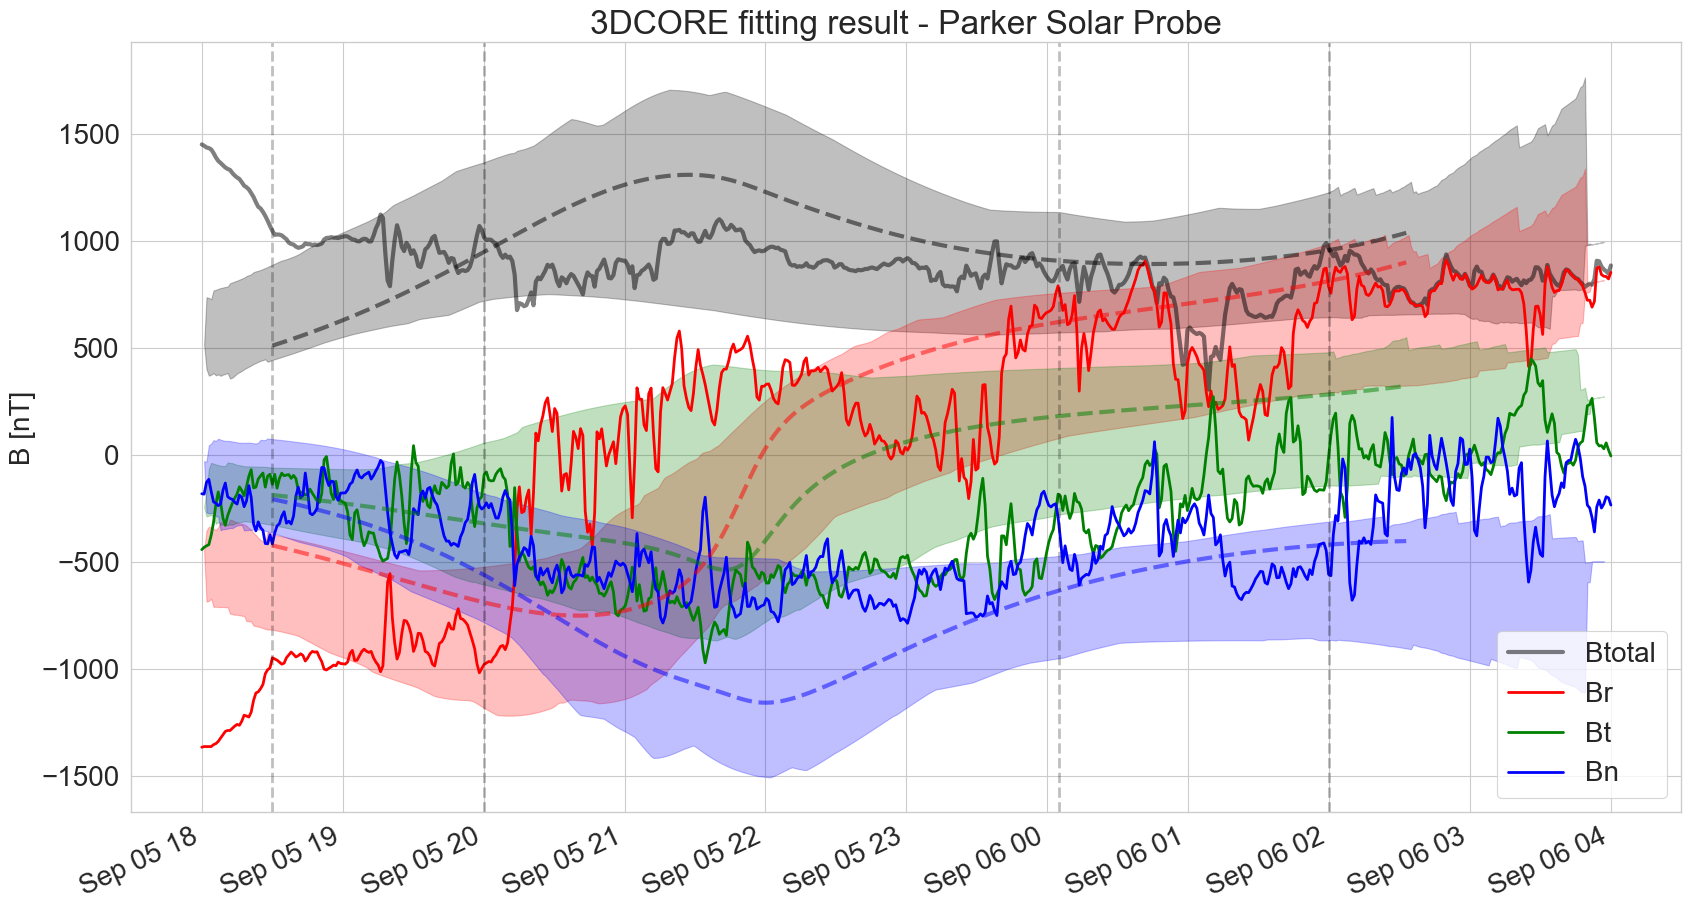

In [96]:
fp.fullinsitu(observer='PSP', t_fit=t_fit, start=t_s, end=t_e, filepath=filepath, max_index=128,
              custom_data='psp_2022sep.p', best=True, ensemble=True, mean=False, save_fig=True, legend=True, fixed=None)

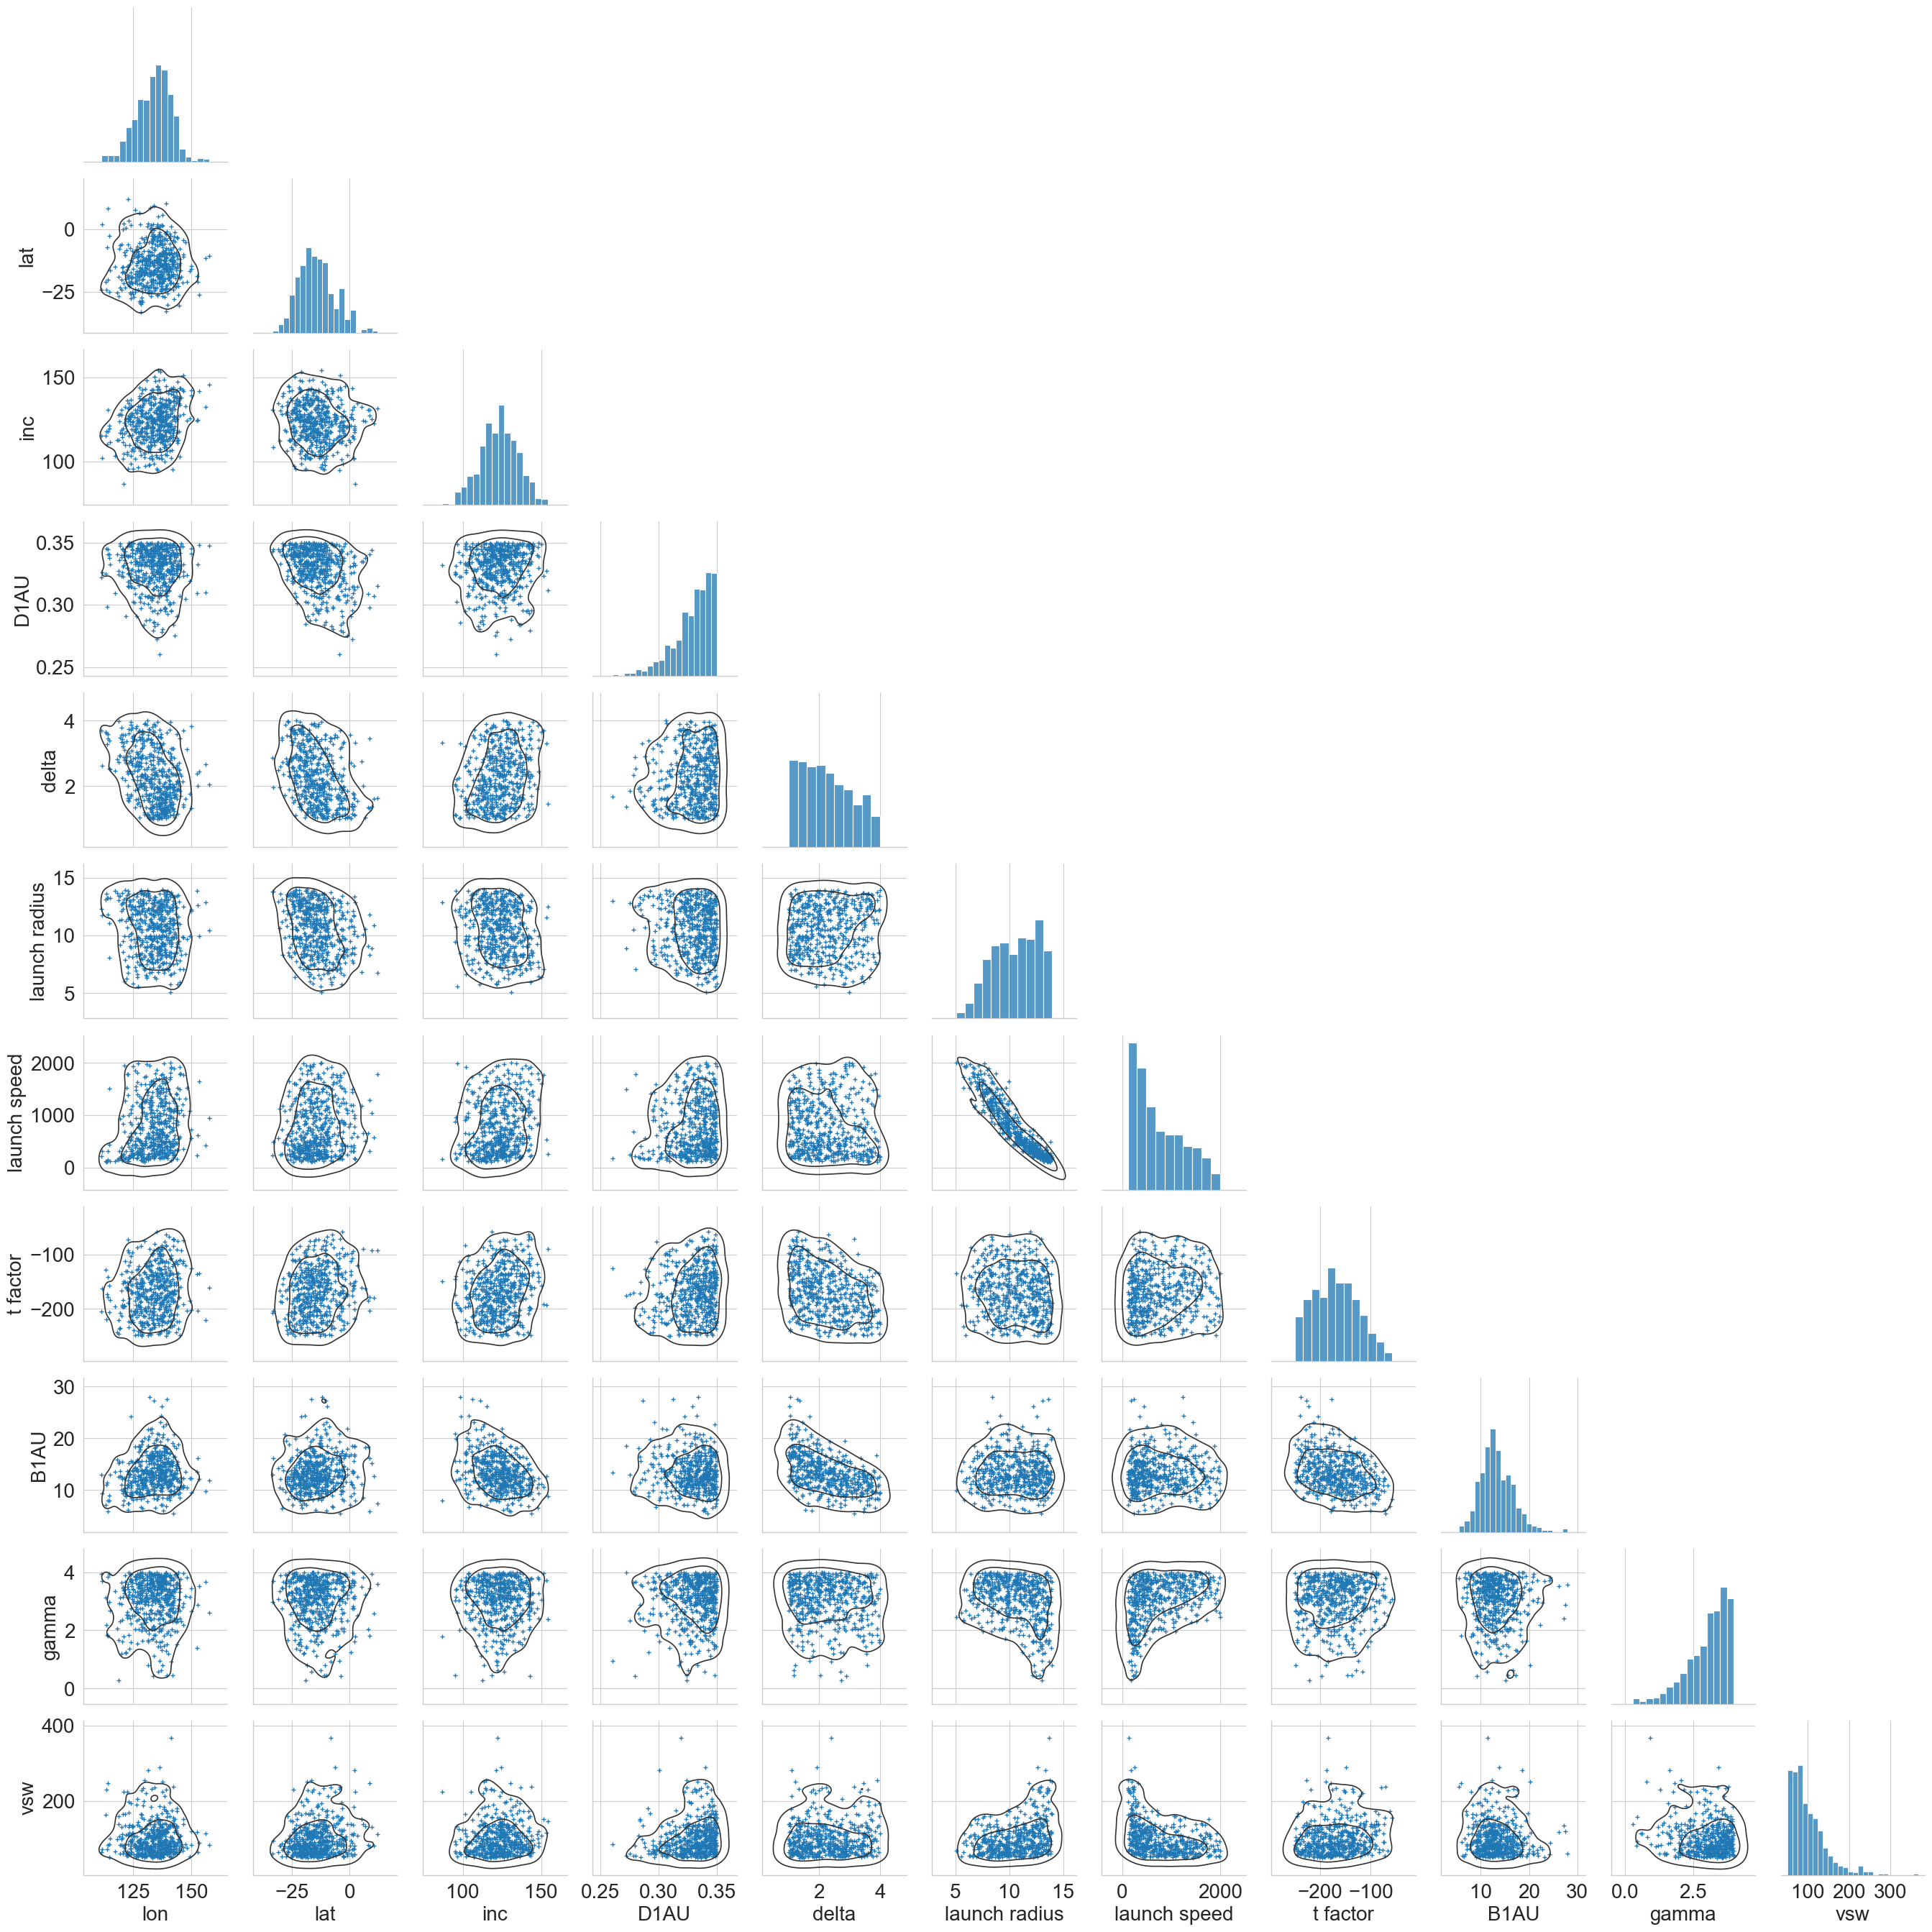

In [97]:
fp.scatterparams(filepath)

In [ ]:
print(out['lon'].mean())
print(out['lon'].std())
print(out['launch radius'].std())
print(out['launch speed'].std())

#### Plotting the fluxrope and spacecraft positions

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
# tm1 = t_launch + datetime.timedelta(days=1.7)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d(spacecraftlist=['psp'], t = tm1, filepath = filepath, custom_data='psp_sep2022.p') #, planetlist =['Earth']

### make fluxrope 3d movie

In [ ]:
def make_frame(k):
    #tm0 = datetime.datetime(2022, 9, 5, 19)
    tm0 =  datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    
    fig = fp.full3d(spacecraftlist=['psp'], planetlist =['Earth'],
              t = t, filepath = filepath, save_fig = False)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d/'+frmstr+'.jpg',dpi=200)  
    return fig
    

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[20:60])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_movie.mp4 -y -loglevel quiet')

### plot fluxrope 3d multiview

In [ ]:
#measurement times 
#tm0 =  t_launch + datetime.timedelta(days=1.5)
tm0 =  datetime.datetime(2022, 9, 5, 16)
tm1 =  datetime.datetime(2022, 9, 5, 20, 30)
tm2 =  t_launch + datetime.timedelta(days=3.5)

fig = fp.full3d_multiview(t_launch = t_launch, filepath=filepath)

### make fluxrope 3d multiview movie

In [ ]:
def make_frame2(k):
    tm0 = datetime.datetime(2022, 9, 5, 16)
    t = tm0 + k*datetime.timedelta(hours=1)
    frametime = k
    
    fig = fp.full3d_multiview_movie(t_launch = tm0, t = t, filepath=filepath,
                                    frametime=k)
    frmstr = '%05i' % (k) 
    plt.savefig(filepath[:-7] + 'movie_3d_multiview/'+frmstr+'.jpg',dpi=200)  
    return fig

In [ ]:
inn=[i for i in range(50)]


mpool = multiprocessing.Pool(processes=5)
mpool.map(make_frame2, inn[0:49])
mpool.close()
mpool.join()

print('done 1/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[20:40])
#mpool.close()
#mpool.join()

#print('done 2/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:60])
#mpool.close()
#mpool.join()

#print('done 3/4')

#mpool = multiprocessing.Pool(processes=5)
#mpool.map(make_frame2, inn[40:80])
#mpool.close()
#mpool.join()

#print('done 4/4')

In [ ]:
os.system('ffmpeg -r 25 -i '+filepath[:-7]+'movie_3d_multiview/%05d.jpg -b 5000k -r 25 '+filepath[:-7]+'movie_3d/full_3d_multiview_movie.mp4 -y -loglevel quiet')

# Used for Debug

In [ ]:
TP_A =  t_launch + datetime.timedelta(hours=2)
TP_B =  t_launch + datetime.timedelta(hours=40)


C_A = "xkcd:red"
C_B = "xkcd:blue"
    
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15, 11),dpi=100)

ax1 = plt.subplot2grid((2, 3), (0, 0),rowspan=2,colspan=2,projection='3d')  
ax2 = plt.subplot2grid((2, 3), (0, 2),projection='3d')  
ax3 = plt.subplot2grid((2, 3), (1, 2),projection='3d')  

model_obj = fp.returnmodel(filepath)


fp.plot_configure(ax1, view_azim=150, view_elev=25, view_radius=.2,light_source=True) #view_radius=.08

fp.plot_3dcore(ax1, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax1, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax1,0.31,-0.25,0.0,-0.2)


fp.plot_configure(ax2, view_azim=165-90, view_elev=90, view_radius=.08,light_source=True)
    
fp.plot_3dcore(ax2, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax2, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax2,0.26,-0.41,0.08,0.0)



fp.plot_configure(ax3, view_azim=65, view_elev=-5, view_radius=.01,light_source=True)
    
fp.plot_3dcore(ax3, model_obj, TP_A, color=C_A,light_source = True)
fp.plot_3dcore(ax3, model_obj, TP_B, color=C_B,light_source = True)

fp.plot_shift(ax3,0.26,-0.41,0.08,0.0)

